1) Plote um gráfico de T por N, onde T é o tempo médio que demora para conseguirmos pelo menos N caras consecutivas em uma sequência de lançamentos consecutivos de moedas.

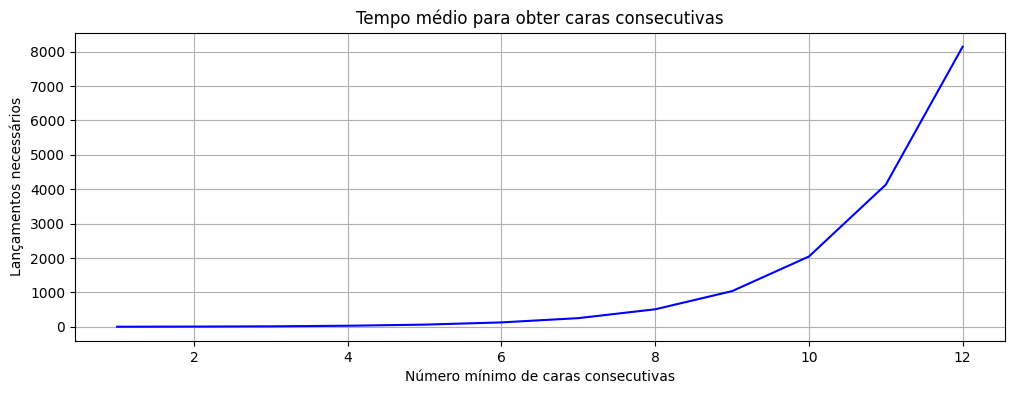

In [609]:
import matplotlib.pyplot as pyplot
import random

CONSECUTIVE_HEADS = 12

def tosses_until_n_consecutive_heads(quantity_of_heads):
    # 0: heads
    # 1: tails
    tosses = 0
    heads = 0
    while heads < quantity_of_heads:
        tosses += 1
        if random.choice([0, 1]) == 0:
            heads += 1
        else:
            heads = 0
    
    return tosses

def montecarlo(consecutive_heads=10, total=2000):
    total_tosses = []
    for heads in range(1, consecutive_heads+1):
        tosses = 0
        for _ in range(total):
            tosses += tosses_until_n_consecutive_heads(heads)

        total_tosses.append(tosses/total)

    return total_tosses

pyplot.plot(range(1, CONSECUTIVE_HEADS+1), montecarlo(CONSECUTIVE_HEADS), color='blue')
pyplot.title('Tempo médio para obter caras consecutivas')
pyplot.ylabel('Lançamentos necessários')
pyplot.xlabel('Número mínimo de caras consecutivas')
pyplot.grid(True)
pyplot.rcParams["figure.figsize"] = [12,4]
pyplot.show()

2) a) Usar a "Vantagem" é bem melhor do que não usar. O Gráfico abaixo simula esse problema, ao lado da legenda está o valor médio de todas as jogadas e pode-se concluir que rodar dois dados sempre será melhor.  
b) Suponha que um ataque como descrito acima acerta o monstro se o resultado obtido na rolagem for maior ou igual que a defesa do monstro (D). Em outras palavras, um ataque é bem sucedido se e somente se d20 >= D. Plote 2 gráficos de A por D, onde A é a porcentagem de ataques bem-sucedidos e D é o valor de defesa do monstro variando de 1 a 20, uma linha representando o ataque sem Vantagem e outra com Vantagem (veja exemplo abaixo).  
c) Não, a habilidade vantagem parece seguir a distribuição normal. A importância está no "meio" do espaço amostral e não nas extremidades.

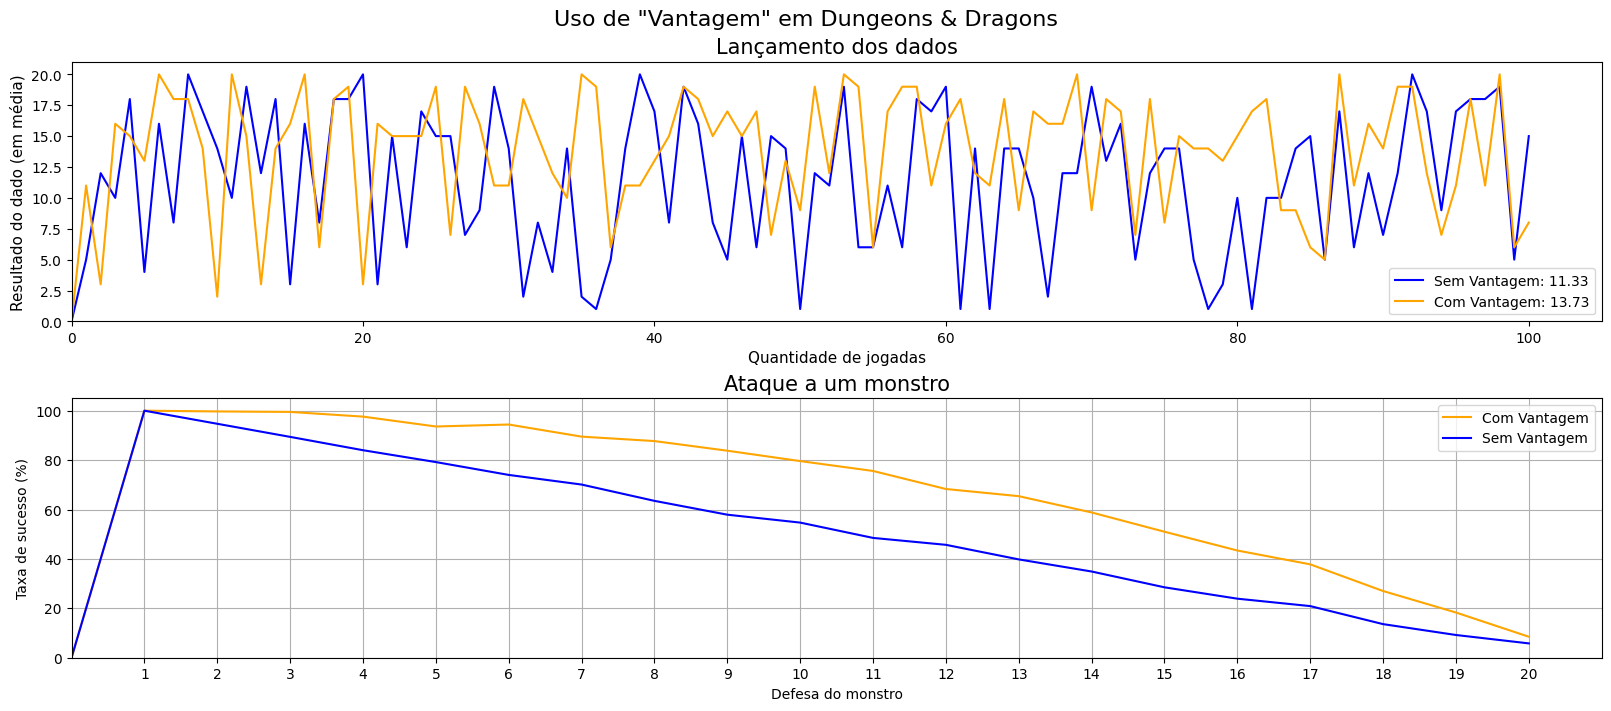

In [655]:
import numpy
import matplotlib.pyplot as pyplot

TOTAL_ROLLS = 100
ATTACK_TOTAL_ROLLS = 1000
DICE_FACES = range(1,21)

def roll_one_dice():
    return numpy.random.choice(DICE_FACES)

def roll_two_dices():
    first_roll = numpy.random.choice(DICE_FACES)
    second_roll = numpy.random.choice(DICE_FACES)

    return max(first_roll, second_roll)

# a)
# Roll the dices TOTAL_ROLLS times
def rolls_result():
    rolls_one_dice = [0]
    rolls_two_dices = [0]
    for i in range(1, TOTAL_ROLLS+1):
        rolls_one_dice.append(roll_one_dice())
        rolls_two_dices.append(roll_two_dices())

    return rolls_one_dice, rolls_two_dices

# b)
def attack():
    one_dice_wins = [0]
    two_dice_wins = [0]
    for defense in DICE_FACES:
        one_dice_win = 0
        two_dice_win = 0
        for _ in range(1, ATTACK_TOTAL_ROLLS+1):
            if roll_one_dice() >= defense:
                one_dice_win += 1
            if roll_two_dices() >= defense:
                two_dice_win += 1
        
        one_dice_wins.append(one_dice_win/10)
        two_dice_wins.append(two_dice_win/10)

    return one_dice_wins, two_dice_wins


one_dice_results, two_dice_results = rolls_result()
one_dice_wins,    two_dice_wins    = attack()

fig, axs = pyplot.subplots(2)
fig.suptitle('Uso de "Vantagem" em Dungeons & Dragons', fontsize=16)
fig.set_constrained_layout(True)
label_one_dice = f'Sem Vantagem: {numpy.average(one_dice_results):.2f}'
label_two_dice = f'Com Vantagem: {numpy.average(two_dice_results):.2f}'
axs[0].set_title("Lançamento dos dados", fontsize=15)
axs[0].set_ylabel("Resultado do dado (em média)", fontsize=11)
axs[0].set_xlabel("Quantidade de jogadas", fontsize=11)
axs[0].plot(one_dice_results, label=label_one_dice, color='blue')
axs[0].plot(two_dice_results, label=label_two_dice, color='orange')
axs[0].set_ylim(ymin=0)
axs[0].set_xlim(left=0)
axs[0].legend(loc='best')

axs[1].plot(two_dice_wins, label='Com Vantagem', color='orange')
axs[1].plot(one_dice_wins, label='Sem Vantagem', color='blue')
axs[1].set_title("Ataque a um monstro", fontsize=15)
axs[1].set_ylabel("Taxa de sucesso (%)", fontsize=10)
axs[1].set_xlabel("Defesa do monstro", fontsize=10)
axs[1].set_ylim(ymin=0)
axs[1].set_xlim(left=0)
axs[1].set_xticks(DICE_FACES)
axs[1].legend(loc='best')
axs[1].grid(True)
pyplot.rcParams["figure.figsize"] = [16,7]
pyplot.show()


3) Suponha que você tem N moedas. Você lança todas elas aleatoriamente e elas saem como cara ou coroa. Então, você seleciona apenas as que saíram como coroa e as lança novamente. Depois do lançamento, você seleciona as que saíram coroa e repete o processo até que todas saiam como cara. Simule o número esperado de lançamentos em função de N.

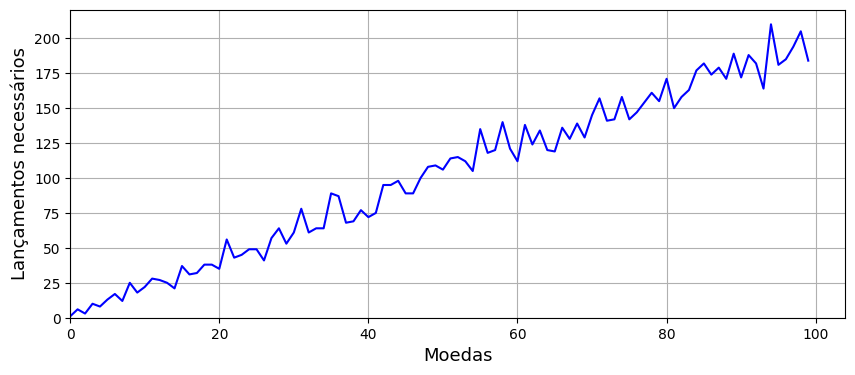

In [653]:
TOSSES = 100

def every_toss_must_be_heads(total_tosses):
    # 0: heads
    # 1: tails
    tosses = 0
    for _ in range(total_tosses):
        toss = numpy.random.choice([0, 1])
        tosses += 1
        if toss == 1:
            while True:
                toss = numpy.random.choice([0, 1])
                tosses += 1
                if toss == 0:
                    break
    
    return tosses

expectation = []
for heads in range(TOSSES):
    expectation.append(every_toss_must_be_heads(heads+1))

fig = pyplot.figure()
ax = fig.add_subplot()
ax.set_xlabel("Moedas", fontsize=13)
ax.set_ylabel("Lançamentos necessários", fontsize=13)
ax.plot(expectation, color='blue')
ax.grid(True)
ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0)
pyplot.rcParams["figure.figsize"] = [10,4]
pyplot.show()




4) Mostre por simulação o curioso resultado de que, para um par de filhos A e B, a probabilidade de que ambos sejam do sexo masculino dado que um deles é do sexo masculino não é 50%

In [524]:
TOTAL = 100000

def make_children(total):
    children = []
    # 0: girl
    # 1: boy
    for _ in range(total):
        child = list(numpy.random.randint(2, size=2))
        children.append(child)

    return children

def simulate():
    at_least_one_boy = 0
    both_boys = 0
    children = make_children(TOTAL)
    for child in children:
        if 1 in child:
            at_least_one_boy += 1
        if child == [1, 1]:
            both_boys += 1
    
    return both_boys/at_least_one_boy

simulate()



0.3351044704566338

5) Uma questão interessante em teoria de probabilidade é o problema do aniversário, que versa sobre a probabilidade de 2 pessoas de um grupo fazerem aniversário em um mesmo dia do ano.
a) Plote um gráfico de P por N simulando a probabilidade P de 2 pessoas quaisquer fizeram aniversário no mesmo dia em um grupo de N pessoas.
b) Plote o mesmo gráfico para 3 pessoas

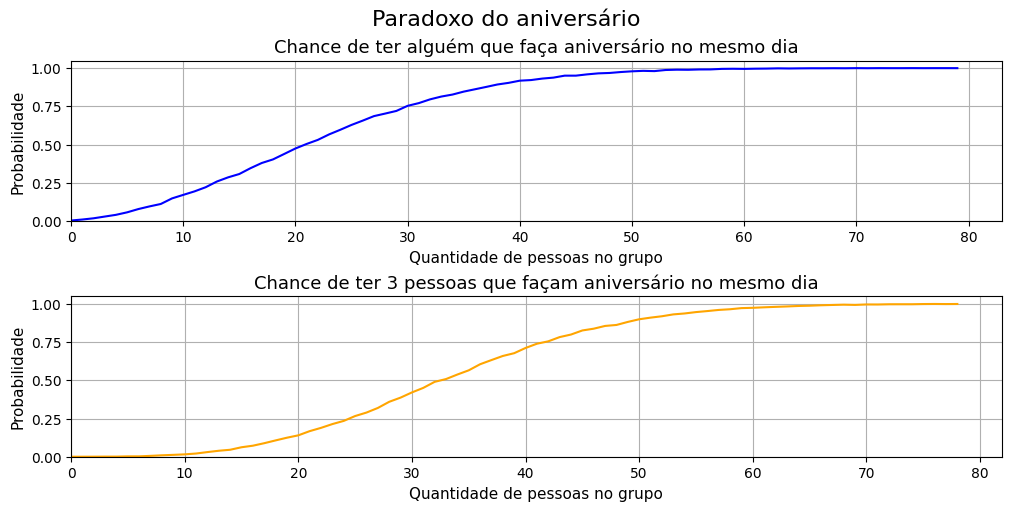

In [29]:
import random
import matplotlib.pyplot as pyplot

GROUP_MEMBERS = 81

# a)
# def birthday_problem(total):
#     days = 365
#     probability = 1 # probabilidade de nao fazer no mesmo dia
#     for day in range(total):
#         probability *= (days-day)/days
    
#     return 1-probability

# a)
def letra_a(n=30, total=10000):
    counter = 0
    for _ in range(total):
        birthdays = [random.randint(1, 366) for _ in range(n)]
        if len(birthdays) != len(set(birthdays)): # caso o tamanho da lista sorteada seja diferente do tamanho da lista sem itens duplicados
            counter += 1

    return counter/total

two_coincidences = []
for n in range(2, GROUP_MEMBERS+1):
    two_coincidences.append(letra_a(n))

# b)
def letra_b(n=30, total=10000):
    counter = 0
    for _ in range(total):
        birthdays = [random.randint(1, 366) for _ in range(n)]
        if len(birthdays) - len(set(birthdays)) >= 2: # caso o tamanho da lista sorteada seja diferente do tamanho da lista sem itens duplicados
            counter += 1

    return counter/total

three_coincidences = []
for n in range(3, GROUP_MEMBERS+1):
    three_coincidences.append(letra_b(n))

pyplot.rcParams["figure.figsize"] = [10,5]
fig, axs = pyplot.subplots(2)
fig.suptitle('Paradoxo do aniversário', fontsize=16)
fig.set_constrained_layout(True)
axs[0].set_title("Chance de ter alguém que faça aniversário no mesmo dia", fontsize=13)
axs[0].set_ylabel("Probabilidade", fontsize=11)
axs[0].set_xlabel("Quantidade de pessoas no grupo", fontsize=11)
axs[0].plot(two_coincidences, color='blue')
axs[0].set_ylim(ymin=0)
axs[0].set_xlim(left=0)
axs[0].grid(True)

axs[1].set_title("Chance de ter 3 pessoas que façam aniversário no mesmo dia", fontsize=13)
axs[1].set_ylabel("Probabilidade", fontsize=11)
axs[1].set_xlabel("Quantidade de pessoas no grupo", fontsize=11)
axs[1].plot(three_coincidences, color='orange')
axs[1].set_ylim(ymin=0)
axs[1].set_xlim(left=0)
axs[1].grid(True)

pyplot.show()


6) Assuma que um bêbado está abraçado a um poste no ponto de coordenada (0,0). Considere que o bêbado decide ir para casa, mas em seu estado inebriado ele caminha 1 metro em em uma direção aleatória a cada passo.
a) Plote o histograma do número de passos que o bêbado leva para alcançar uma distância maior que 5 metros em relação ao poste.
b) Plote um gráfico D por N, mostrando a distância média D que o bêbado está do poste após N passos.


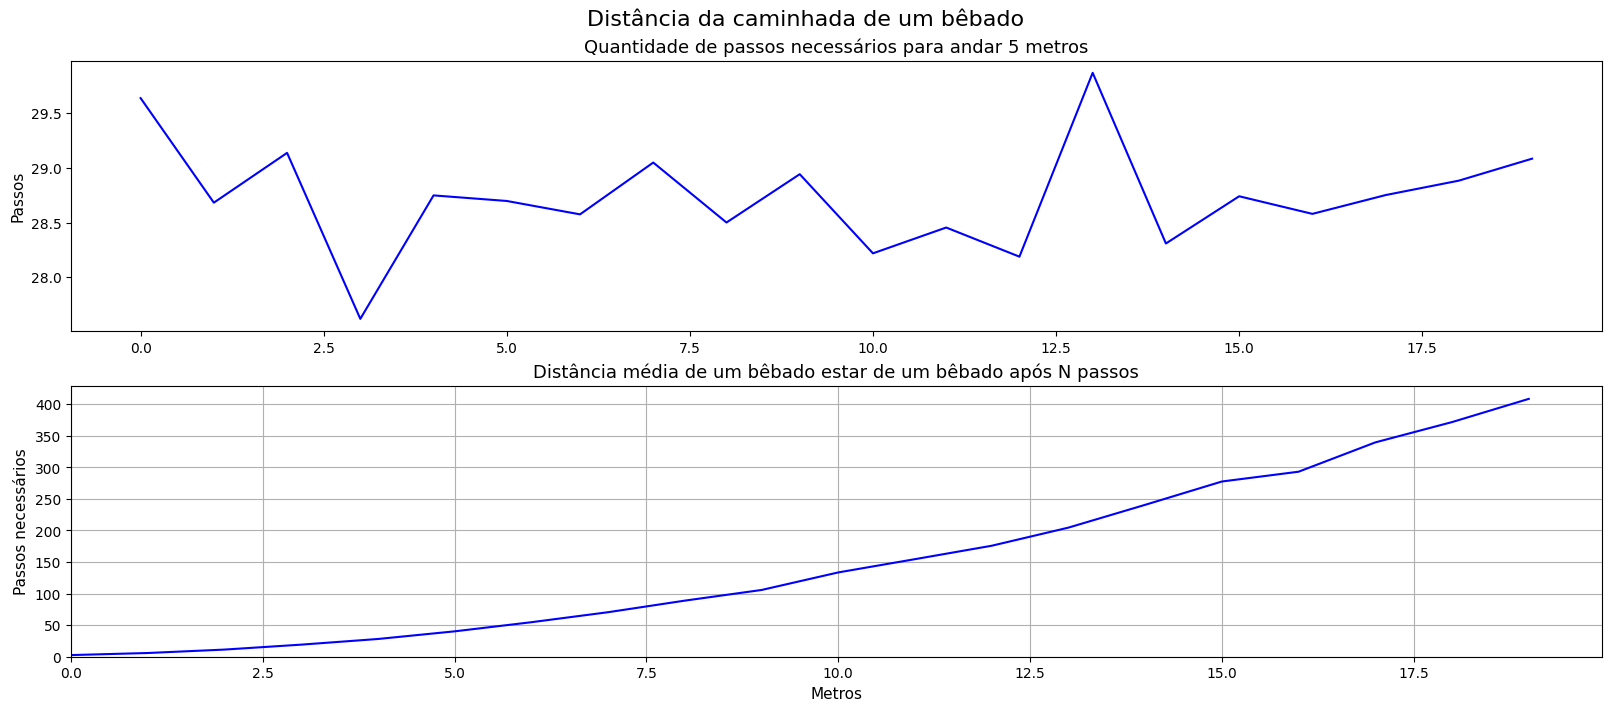

In [635]:
import numpy
import matplotlib.pyplot as pyplot
import math

TOTAL = 2000

def distance_drunken_walk(distance=5):
    x, y = 0, 0
    steps = 0

    while True:
        angle = numpy.random.uniform(0, 2*numpy.pi)
        x += numpy.cos(angle)
        y += numpy.sin(angle)
        steps += 1
        if math.dist([x, y], [0, 0]) > distance:
            break

    return steps

def montecarlo(total=2000):
    total_tosses_a = []
    total_tosses_b = []
    for distance in range(1, 21):
        tosses_a = 0
        tosses_b = 0
        for _ in range(total):
            tosses_a += distance_drunken_walk(5)
            tosses_b += distance_drunken_walk(distance)

        total_tosses_a.append(tosses_a/total)
        total_tosses_b.append(tosses_b/total)

    return total_tosses_a, total_tosses_b

steps_a, steps_b = montecarlo()

# a)
fig, axs = pyplot.subplots(2)
fig.suptitle("Distância da caminhada de um bêbado", fontsize=16)
fig.set_constrained_layout(True)
axs[0].set_title("Quantidade de passos necessários para andar 5 metros", fontsize=13)
axs[0].set_ylabel("Passos", fontsize=11)
axs[0].plot(steps_a, color='blue')

# b)
axs[1].plot(steps_b, color='blue')
axs[1].set_title("Distância média de um bêbado estar de um bêbado após N passos", fontsize=13)
axs[1].set_xlabel("Metros", fontsize=11)
axs[1].set_ylabel("Passos necessários", fontsize=11)
axs[1].grid(True)
axs[1].set_ylim(ymin=0)
axs[1].set_xlim(xmin=0)
pyplot.rcParams["figure.figsize"] = [16,7]
pyplot.show()


7) A figura do final da lista mostra a América do Sul como um grafo de adjacências de países. Suponha um processo markoviano em que, a cada passo, um turista viaja de um país para outro do grafo. A cada passo, o turista sai do país atual e tem probabilidade igual de escolher qualquer um dos países adjacentes como destino.  
a) Qual a probabilidade de, após um número grande de passos, o turista estar no Brasil?  
b) Quantos passos em média o turista precisa dar para visitar pelo menos uma vez cada país do grafo?  
c) Qual a probabilidade de um turista que está agora no Brasil estar ainda no Brasil daqui 2, 3 ou 4 passos?  
d) Qual a probabilidade que em uma caminhada de 10 passos começando no Brasil o turista não visite o Chile?

In [51]:
import numpy

transition = numpy.array([
    # br  ,  fg ,  s  ,   g ,  v  , co  ,  e  , pe  , bo  ,  ch ,  pa ,  a  ,  u
    [  0  , 1/9 , 1/9 , 1/9 , 1/9 , 1/9 ,  0  , 1/9 , 1/9 ,  0  , 1/9 ,  0  , 1/9 ], # br
    [ 1/2 ,  0  , 1/2 ,  0  ,  0  ,  0  ,  0  ,  0  ,  0  ,  0  ,  0  ,  0  ,  0  ], # fg
    [ 1/3 , 1/3 ,  0  , 1/3 ,  0  ,  0  ,  0  ,  0  ,  0  ,  0  ,  0  ,  0  ,  0  ], # s
    [ 1/3 ,  0  , 1/3 ,  0  , 1/3 ,  0  ,  0  ,  0  ,  0  ,  0  ,  0  ,  0  ,  0  ], # g
    [ 1/3 ,  0  ,  0  , 1/3 ,  0  , 1/3 ,  0  ,  0  ,  0  ,  0  ,  0  ,  0  ,  0  ], # v
    [ 1/4 ,  0  ,  0  ,  0  , 1/4 ,  0  , 1/4 , 1/4 ,  0  ,  0  ,  0  ,  0  ,  0  ], # co
    [  0  ,  0  ,  0  ,  0  ,  0  , 1/2 ,  0  , 1/2 ,  0  ,  0  ,  0  ,  0  ,  0  ], # e
    [ 1/5 ,  0  ,  0  ,  0  ,  0  , 1/5 , 1/5 ,  0  , 1/5 , 1/5 ,  0  ,  0  ,  0  ], # pe
    [ 1/5 ,  0  ,  0  ,  0  ,  0  ,  0  ,  0  , 1/5 ,  0  , 1/5 , 1/5 , 1/5 ,  0  ], # bo
    [  0  ,  0  ,  0  ,  0  ,  0  ,  0  ,  0  , 1/3 , 1/3 ,  0  ,  0  , 1/3 ,  0  ], # ch
    [ 1/3 ,  0  ,  0  ,  0  ,  0  ,  0  ,  0  ,  0  , 1/3 ,  0  ,  0  , 1/3 ,  0  ], # pa
    [ 1/5 ,  0  ,  0  ,  0  ,  0  ,  0  ,  0  ,  0  , 1/5 , 1/5 , 1/5 ,  0  , 1/5 ], # a
    [ 1/2 ,  0  ,  0  ,  0  ,  0  ,  0  ,  0  ,  0  ,  0  ,  0  ,  0  , 1/2 ,  0  ], # u
])

# a)
# Nao dá pra fazer elevando a matriz a n? A^n
def letra_a(total=10000):
    city = 0
    visit_to_br = 0
    for _ in range(total):
        city = numpy.random.choice([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 1, p=transition[city])[0]
        if city == 0:
            visit_to_br += 1

    return visit_to_br / total


# b)
def letra_b(total=10000):
    city = 0
    visited_cities_counter = [0] * 13
    visits = 0
    while sum(visited_cities_counter) != 13:
        city = numpy.random.choice([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 1, p=transition[city])[0]
        visits += 1
        if visited_cities_counter[city] == 0:
            visited_cities_counter[city] = 1
    
    return visits

# c)
def letra_c(total=10000):
    city = 0
    two = 0
    three = 0
    four = 0
    for i in range(1, 5):
        for _ in range(total):
            city = numpy.random.choice([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 1, p=transition[city])[0]
            if i == 2 and city == 0:
                two += 1
            if i == 3 and city == 0:
                three += 1
            if i == 4 and city == 0:
                four += 1

    return two/total, three/total, four/total

def letra_d(total=10000):
    city = 0
    count = 0
    for _ in range(total):
        visited = []
        for _ in range(1, 11):
            city = numpy.random.choice([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 1, p=transition[city])[0]
            visited.append(city)
        
        if visited.count(9) == 0:
            count += 1

    return count/total




print("a)", letra_a())
print("b)", letra_b())
print("c)", letra_c())
print("d)", letra_d())

a) 0.208
b) 60
c) (0.2081, 0.2036, 0.2031)
d) 0.609


8.  No jogo banco imobiliário, você joga 2d6 (obtendo um resultado de 2 a 12) e anda esse número de espaços ao redor do tabuleiro (veja por exemplo a imagem do tabuleiro no final desta lista). Os espaços com retângulos coloridos representam propriedades imobiliárias (ignore os efeitos dos outros espaços).  
a) Considerando que uma partida de Banco Imobiliário demora um tempo tendendo a infinito (como qualquer pessoa que já jogou Banco Imobiliário pode confirmar), qual a probabilidade de cairmos em cada propriedade após um número muito grande de jogadas?  
b) Considerando agora que ao parar no espaço do canto superior direito do tabuleiro ("vá para a prisão), o jogador é transportado para o espaço inferior esquerdo ("prisão"), simule novamente as probabilidades.  
c) Considerando que as melhores propriedades imobiliárias são aquelas onde os jogadores param com frequência, qual você diria que é a melhor cor de propriedades no tabuleiro?  

In [13]:
import numpy

def letra_a(total=20000):
    properties = [0] * 40
    current_position = 0

    for _ in range (1, total):
        dice = np.random.choice([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 1)[0]
        current_position = (dice + current_position) % 40
        properties[current_position] += 1

    return np.divide(properties, total)

def letra_b(total=20000):
    properties = [0] * 40
    current_position = 0

    for _ in range (1, total):
        dice = np.random.choice([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 1)[0]
        current_position = (dice + current_position) % 40
        if current_position == 30:
            current_position = 10

        properties[current_position] += 1

    return np.divide(properties, total)


print("a)");print(letra_a())
print("\nb)");print(letra_b())

a)
[0.02775 0.02355 0.0228  0.026   0.0247  0.02555 0.0245  0.0261  0.02555
 0.024   0.0241  0.02605 0.0233  0.02565 0.027   0.02345 0.02615 0.02495
 0.02465 0.0239  0.0247  0.02455 0.0258  0.02535 0.02455 0.0243  0.02605
 0.026   0.02555 0.02355 0.0229  0.0245  0.02495 0.02695 0.0236  0.0264
 0.02545 0.02475 0.02605 0.0243 ]

b)
[0.0227  0.02095 0.02    0.02505 0.02315 0.0237  0.02545 0.024   0.02195
 0.0245  0.04915 0.0234  0.02465 0.0236  0.0253  0.02745 0.02765 0.0263
 0.0271  0.0276  0.02625 0.0285  0.02625 0.0264  0.02485 0.0261  0.02735
 0.02855 0.0262  0.02725 0.      0.0281  0.02585 0.02295 0.02315 0.02505
 0.0237  0.02365 0.0231  0.02305]


9.  a) Os times de futebol Vermelho FC e Azul FC jogam uma partida. Suponha que os times marcam gols de forma independente seguindo processos de Poisson com taxas de chegada λv = 2/partida e λa = 3/partida. Qual a taxa de partidas que podemos esperar que o time Vermelho FC ganha?  
b) Resolva o mesmo exercício para os times de basquete RedCats e BlueDogs, assumindo taxas de chegada de pontos de λr = 100/partida e λb = 150/partida, respondendo quantas vezes podemos esperar que o time RedCats ganha.  
c) Compare os resultados e explique.

In [ ]:
import numpy

def letra_a():
    lamb_red = 2
    lamb_blue = 3

    print()